# 9 June 2022: Water Usage

Last year we moved to a new place. When we got the first water bill, it seemed, well, high. Very high. High enough, in fact, to breach the first price tier, second price tier, <i>and</i> the third price tier before landing at the high end of the fourth. Yikes. But having never been responsible for paying a water bill before (landlords are obliged to do this for apartment tenants here, and now we were in a single-family home), I had no real idea of what was normal and was prepared to accept whatever came our way.

Well, a quick survey of friends confirmed that our bill was indeed high, easily tripling the average water usage of my highly unscientific sample. So, I did what anyone would do and started monitoring the water meter--at least that way there would be no surprises on the bi-monthly bill.

Anyway, we quickly discovered the culprit (several major hemorrhages in a slipshod irrigation line), but I went on monitoring our usage as we continued to tweak things here and there. To satisfy my own curiosity and keep up with the project of monitoring our usage, I decided to keep this notebook and draw up a few charts.

Without further ado, then, our standard imports:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We'll import the dataset next and have a look:

In [2]:
data = pd.read_csv('../data/water.csv')
data

,date,meter
0,10/5/21,899.00
1,11/15/21,923.00
2,12/1/21,927.78
3,12/12/21,928.99
4,12/19/21,929.90
5,1/3/22,931.76
6,1/11/22,932.77
7,1/21/22,934.23
8,1/25/22,934.77
9,2/2/22,936.48


Simple: dates in one column, meter readings in another.

The first thing you'll notice is that is the irregular spacing between my readings--sometimes once a week, sometimes once a month. The second is that charting this data as is won't yield anything very interesting except a line moving up and to the right. What we want, or at least what I would find useful for my purposes, is to generate a projected 60-day usage based on each reading, since that's the interval the water company bills on. So what we'll need is to calculate a projected 60-day water usage based on the difference between one reading and the last and the interval of time separating those two readings.

First I'll convert the date field to a pandas <code>datetime</code> object:

In [3]:
data.date = pd.to_datetime(data.date)
data

,date,meter
0,2021-10-05,899.00
1,2021-11-15,923.00
2,2021-12-01,927.78
3,2021-12-12,928.99
4,2021-12-19,929.90
5,2022-01-03,931.76
6,2022-01-11,932.77
7,2022-01-21,934.23
8,2022-01-25,934.77
9,2022-02-02,936.48


Then we need two new columns: one for the time delta (i.e., the number of days between readings), and the other for the meter delta (i.e., the amount of water used between readings):

In [4]:
data['time_delta'] = data.date.diff().dt.days
data['meter_delta'] = data.meter.diff()
data

,date,meter,time_delta,meter_delta
0,2021-10-05,899.00,NaN,NaN
1,2021-11-15,923.00,41.0,24.00
2,2021-12-01,927.78,16.0,4.78
3,2021-12-12,928.99,11.0,1.21
4,2021-12-19,929.90,7.0,0.91
5,2022-01-03,931.76,15.0,1.86
6,2022-01-11,932.77,8.0,1.01
7,2022-01-21,934.23,10.0,1.46
8,2022-01-25,934.77,4.0,0.54
9,2022-02-02,936.48,8.0,1.71


From here we can calculate the average daily use (<code>meter_delta / time_delta</code>) and then the projected 60-day usage (<code>daily * 60</code>):

In [5]:
data['daily'] = data.meter_delta / data.time_delta
data['bimonthly'] = data.daily * 60
data

,date,meter,time_delta,meter_delta,daily,bimonthly
0,2021-10-05,899.00,NaN,NaN,NaN,NaN
1,2021-11-15,923.00,41.0,24.00,0.585366,35.121951
2,2021-12-01,927.78,16.0,4.78,0.298750,17.925000
3,2021-12-12,928.99,11.0,1.21,0.110000,6.600000
4,2021-12-19,929.90,7.0,0.91,0.130000,7.800000
5,2022-01-03,931.76,15.0,1.86,0.124000,7.440000
6,2022-01-11,932.77,8.0,1.01,0.126250,7.575000
7,2022-01-21,934.23,10.0,1.46,0.146000,8.760000
8,2022-01-25,934.77,4.0,0.54,0.135000,8.100000
9,2022-02-02,936.48,8.0,1.71,0.213750,12.825000


Now this is useful, since we can plot the <code>daily</code> or <code>bimonthly</code> columns to get a sense for how our water usage is changing over time.

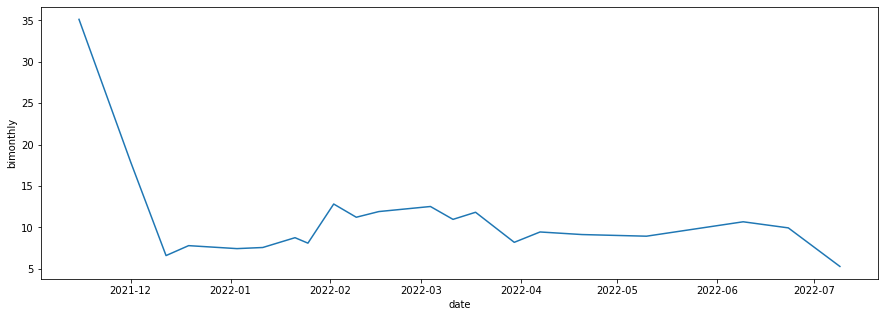

In [6]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data.date, y=data.bimonthly);

That right there is what an irrigation hemorrhage looks like! But actually I'd like to resize the plot now so that I can get a better sense of how our usage is varying, excluding the initial reading.

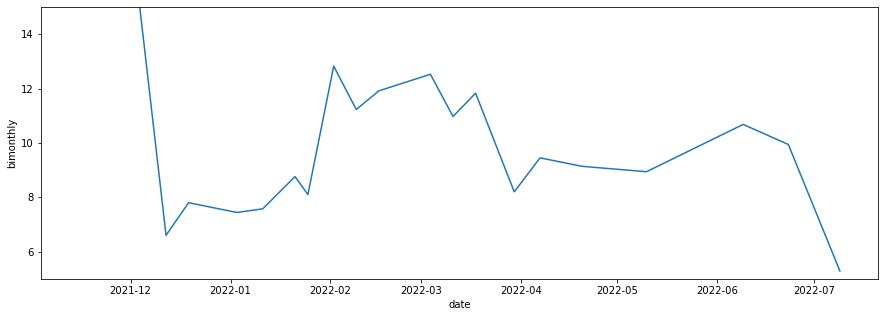

In [7]:
plt.figure(figsize=(15,5))
plt.ylim((5,15))
sns.lineplot(x=data.date, y=data.bimonthly);